# Visualising `cohorta_sfd`

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the CSV file into a DataFrame
df = pd.read_csv('csv-files/cohorta_sfd.csv')

# Display the first few rows of the DataFrame
print(df.head())

   subject_id   hadm_id   stay_id         dod  mortality_year  sofa  \
0    10887646  25719925  37802486  2115-02-25               1    16   
1    11208462  29387591  31620695         NaN               0    14   
2    15599376  25117778  33587447  2158-10-04               1    13   
3    16957926  23975043  31173862  2114-03-22               1    17   
4    10657383  22839005  35900169  2134-10-29               1    16   

   respiration  coagulation  liver  cardiovascular  cns  renal  
0            4            3      2               4    0      3  
1            4            1      3               1    1      4  
2            4            1      1               4    0      3  
3            3            2      1               4    4      3  
4            0            4      4               4    0      4  


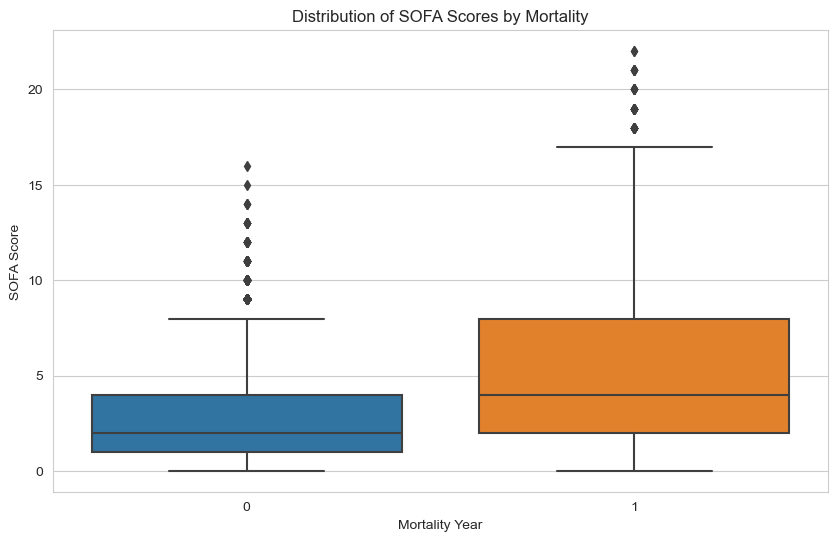

In [10]:
# Visualize the SOFA scores using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='mortality_year', y='sofa')
plt.title('Distribution of SOFA Scores by Mortality')
plt.xlabel('Mortality Year')
plt.ylabel('SOFA Score')
plt.show()

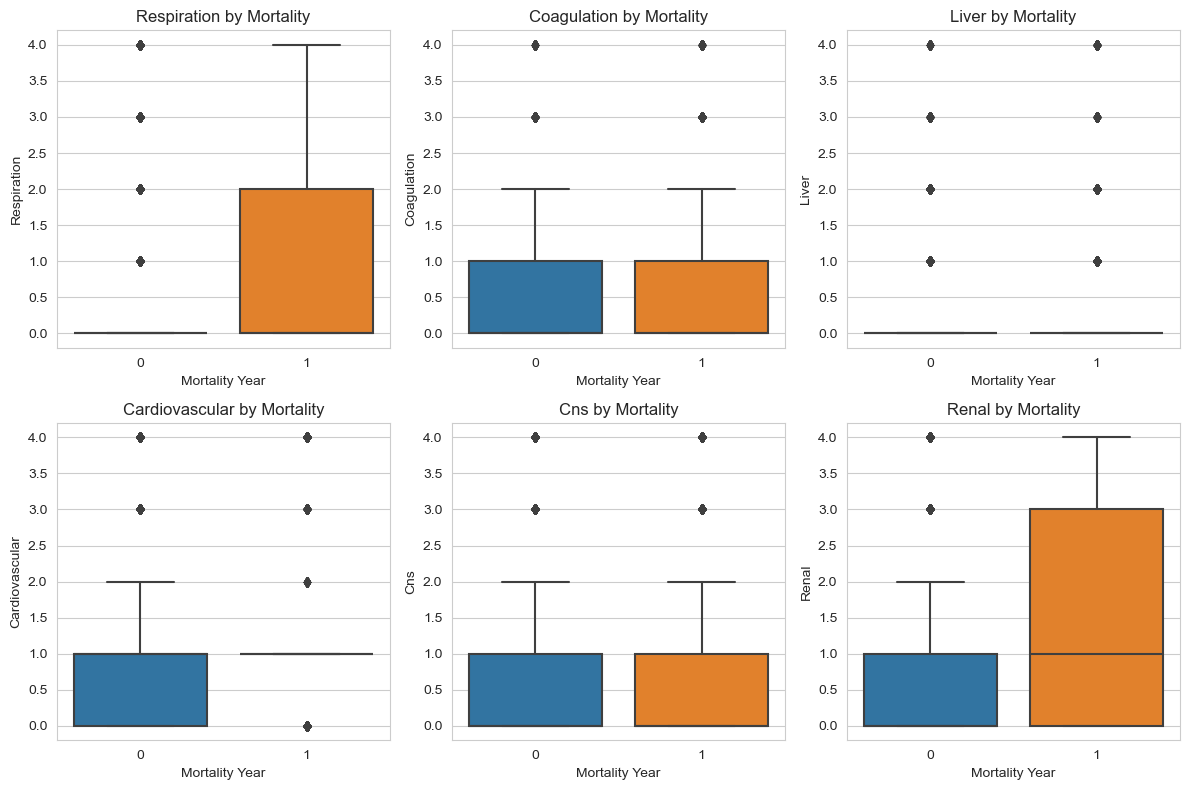

In [11]:
# Visualize individual components of SOFA scores using a boxplot
components = ['respiration', 'coagulation', 'liver', 'cardiovascular', 'cns', 'renal']
plt.figure(figsize=(12, 8))
for i, component in enumerate(components, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='mortality_year', y=component)
    plt.title(f'{component.capitalize()} by Mortality')
    plt.xlabel('Mortality Year')
    plt.ylabel(component.capitalize())
plt.tight_layout()
plt.show()

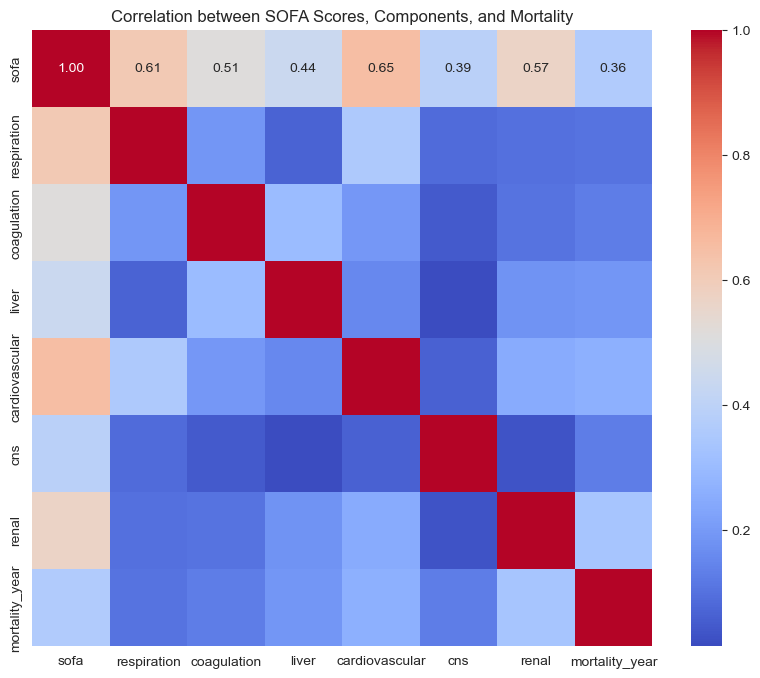

In [12]:
# Convert mortality_year to a categorical variable for better plotting
df['mortality_year'] = df['mortality_year'].astype('category')

# Correlation Matrix Heatmap
correlation = df[['sofa', 'respiration', 'coagulation', 'liver', 'cardiovascular', 'cns', 'renal', 'mortality_year']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between SOFA Scores, Components, and Mortality')
plt.show()

This visualisation allows you to see how the mortality changes with increasing scores in each category.

/var/folders/qx/z84st131701638nk2szvlrzm0000gn/T/ipykernel_55089/1397187511.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = df.groupby([component, 'mortality_year']).size().unstack(fill_value=0)
/var/folders/qx/z84st131701638nk2szvlrzm0000gn/T/ipykernel_55089/1397187511.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = df.groupby([component, 'mortality_year']).size().unstack(fill_value=0)
/var/folders/qx/z84st131701638nk2szvlrzm0000gn/T/ipykernel_55089/1397187511.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

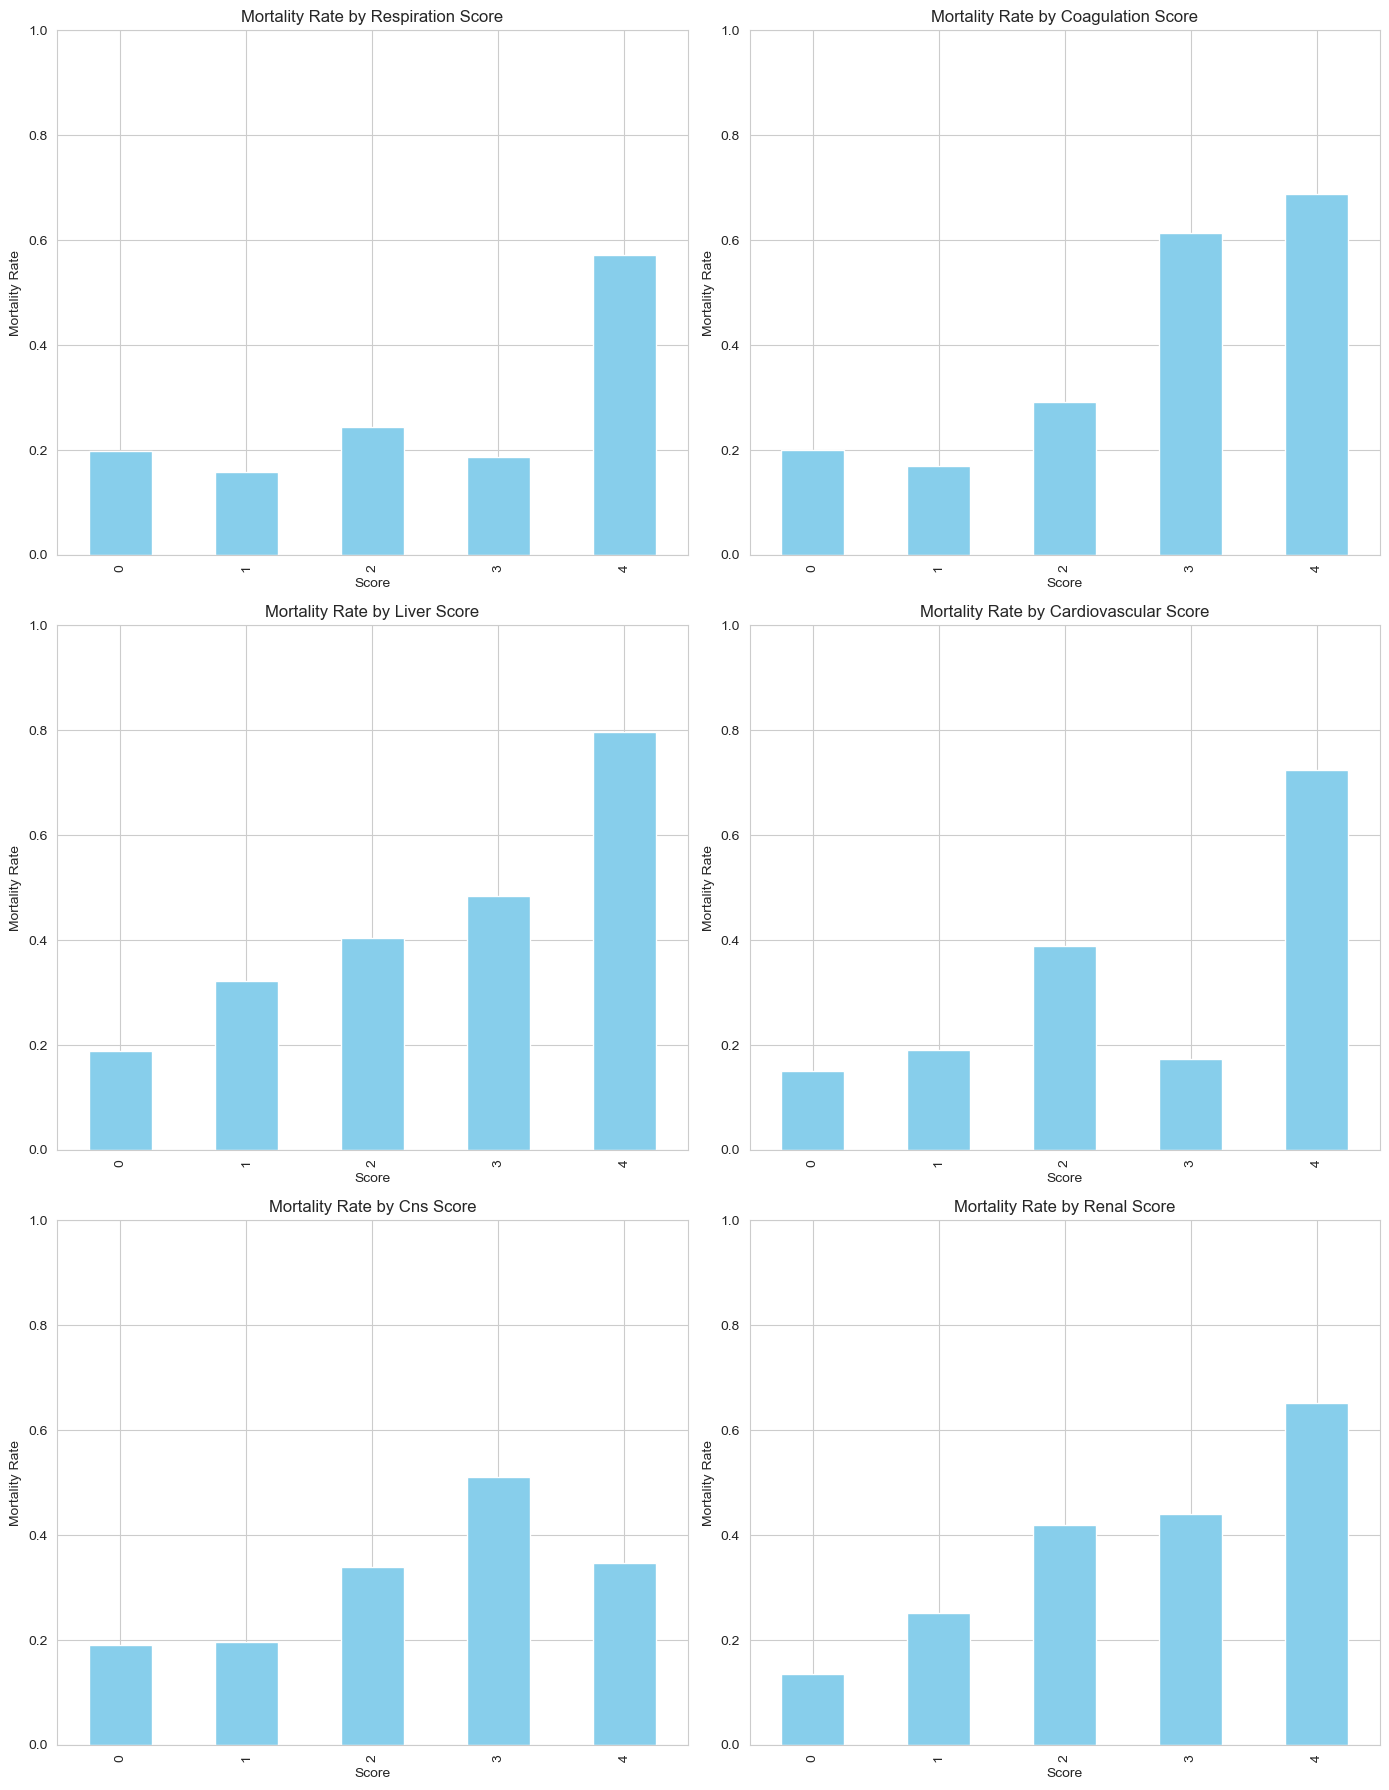

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of SOFA components
components = ['respiration', 'coagulation', 'liver', 'cardiovascular', 'cns', 'renal']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plotting
for i, component in enumerate(components):
    # Create a temporary dataframe with counts of mortality for each score in the component
    temp_df = df.groupby([component, 'mortality_year']).size().unstack(fill_value=0)
    # Calculate mortality rates
    temp_df['mortality_rate'] = temp_df[1] / (temp_df[0] + temp_df[1])
    # Plot
    temp_df['mortality_rate'].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Mortality Rate by {component.capitalize()} Score')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Mortality Rate')
    axes[i].set_ylim(0, 1)  # Set the limit for the y-axis

# Adjust the layout
plt.tight_layout()
plt.show()